<a href="https://colab.research.google.com/github/gstripling00/introduction_to_neural_networks/blob/Notebooks/RMSE_simple_neural_network_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Neural Network using Keras


## Introduction 
I created a prediction model for sales analysis. In this model, we need to feed the advertising budget of TV, radio, and newspapers to the model and the model will forecast the possible sales. For designing the model, the machine learning method I opted for is simple linear regression, and the programming was done in Jupyter notebook.

## Dataset
The advertising dataset captures the sales revenue generated with respect to advertisement costs across numerous platforms like radio, TV, and newspapers.

### Features:

#### Digital: advertising dollars spent on Internet.
#### TV: advertising dollars spent on TV.
#### Radio: advertising dollars spent on Radio.
#### Newspaper: advertising dollars spent on Newspaper.

### Target (Label):
#### Sales budget

### Import Libraries

In [29]:
# Import the necessary libraries 

# For Data loading, Exploraotry Data Analysis, Graphing
import pandas as pd   # Pandas for data processing libraries
import numpy as np    # Numpy for mathematical functions

import matplotlib.pyplot as plt # Matplotlib for visualization tasks
import seaborn as sns # Seaborn for data visualization library based on matplotlib. 
%matplotlib inline    

import sklearn        # ML tasks
from sklearn.model_selection import train_test_split # Split the dataset
from sklearn.metrics import mean_squared_error  # Calculate Mean Squared Error

# Build the Network
from tensorflow import keras
from keras.models import Sequential
#from tensorflow.keras.models import Sequential
from keras.layers import Dense


#from keras.callbacks import EarlyStopping


### The Dataset

You will use the [USA housing prices](https://www.kaggle.com/kanths028/usa-housing) dataset found on Kaggle.  The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [30]:
# Next, you read the dataset into a Pandas dataframe.

url = 'https://github.com/gstripling00/introduction_to_neural_networks/blob/Datasets/Advertising_2023.csv?raw=true'
advertising_df= pd.read_csv(url,index_col=0)

In [3]:
advertising_df.head(10)

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9
6,13.05,8.7,48.9,75.0,7.2
7,86.25,57.5,32.8,23.5,11.8
8,180.30,120.2,19.6,11.6,13.2
9,12.90,8.6,2.1,1.0,4.8
10,299.70,199.8,2.6,21.2,10.6


In [31]:
# Pandas info() function is used to get a concise summary of the dataframe.
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [32]:
'''====== Data Exploration and Preprocessing ======'''

#shape of dataframe - 1199 rows, five columns
advertising_df.shape

(1199, 5)

Let's check for any null values.

In [33]:
# The isnull() method is used to check and manage NULL values in a data frame.
advertising_df.isnull().sum()

digital      0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [34]:
#check there are any NAN values
advertising_df.isnull().values.any()

False

In [35]:
'''=== show the statistics analysis of each attributes ==='''

#descriptive statistics 
advertising_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


## Exploratory Data Analysis (EDA)

Let's create some simple plots to check out the data!  

<Axes: >

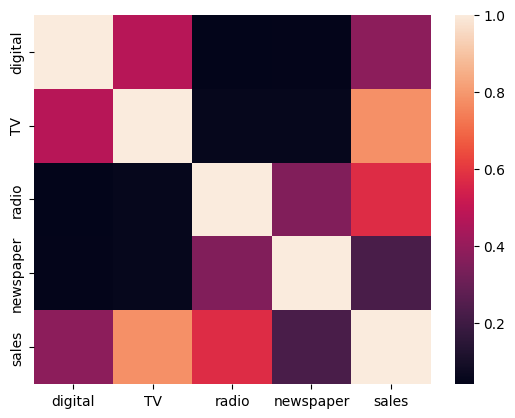

In [36]:
# The heatmap is a way of representing the data in a 2-dimensional form. The data values are represented as colors in the graph.
# The goal of the heatmap is to provide a colored visual summary of information.
sns.heatmap(advertising_df.corr()) 

<Axes: >

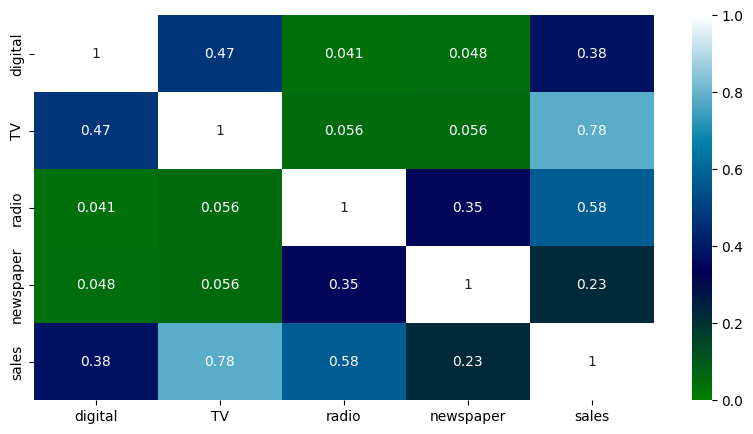

In [37]:
## Another option is to plot the heatmap so that the values are shown.

plt.figure(figsize=(10,5))
sns.heatmap(advertising_df.corr(),annot=True,vmin=0,vmax=1,cmap='ocean')


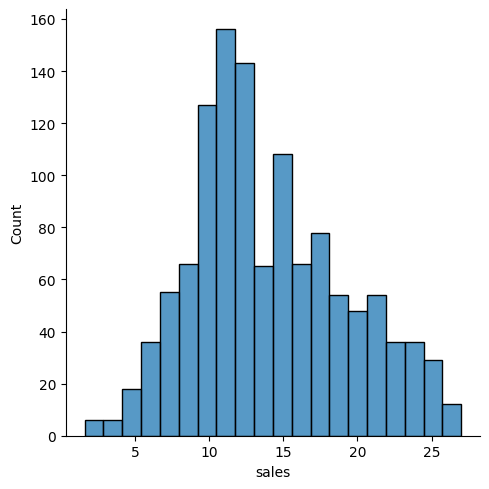

In [38]:
# It is used basically for univariant set of observations and visualizes it through a histogram i.e. only one observation
# and hence you choose one particular column of the dataset.
sns.displot(advertising_df['sales'])

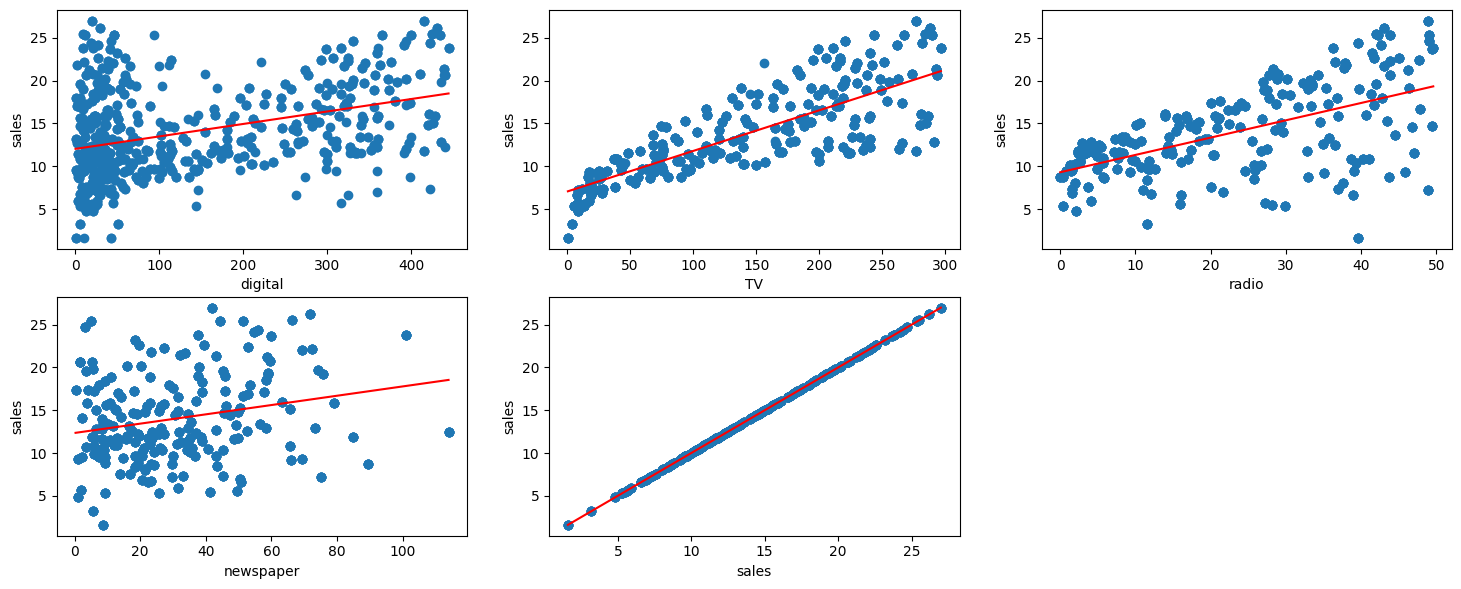

In [39]:
'''=== Show the linear relationship between features  and price. Thus, it provides that how the scattered 
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with sales
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(advertising_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = advertising_df[col] #x-axis
    y = advertising_df['sales'] #y-axis
    plt.plot(x, y, 'o')
    
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('sales') # y-label
    

## Training a Linear Regression Model

Regression is a supervised machine learning process.  It is similar to classification, but rather than predicting a label, you try to predict a continuous value.   Linear regression defines the relationship between a target variable (y) and a set of predictive features (x).  Simply stated, If you need to predict a number, then use regression. 

Let's now begin to train your regression model! You will need to first split up your data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. You will toss out the Address column because it only has text info that the linear regression model can't use.

### X (features) and y (target) arrays

Next, let's define the features and label.  Briefly, feature is input; label is output. This applies to both classification and regression problems.

In [40]:
X = advertising_df[['digital', 'TV', 'radio', 'newspaper']]
y = advertising_df['sales']

In [41]:
'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(X.values)
print(normalized_feature)

[[0.89211961 0.4032179  0.0977028  0.17886333]
 [0.66254734 0.45658693 0.39008405 0.44765371]
 [0.29009225 0.20576311 0.51609436 0.77920128]
 ...
 [0.06744611 0.99272247 0.05163843 0.08536149]
 [0.19480049 0.91868871 0.08898294 0.33188231]
 [0.06744611 0.99272247 0.05163843 0.08536149]]


## Train - Test - Split

Now let's split the data into a training and test set.  Note:  Best pracices is to split into three - training, validation, and test set.


In [42]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [43]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape )

(719, 4) (480, 4) (719,) (480,)


# Building our network
Because so few samples are available, we will be using a very small network with two hidden layers, each with 64 units. In general, the less training data you have, the worse overfitting will be, and using a small network is one way to mitigate overfitting.

In [44]:
## Build Model
model = Sequential()
model.add(Dense(4,activation='relu')) # You don't have to specify input size.Just define the hidden layers 
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

# Compile Model
model.compile(optimizer='adam', loss='mse',metrics=['mse'])

#  Fit the Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 32)




Epoch 1/32
23/23 [==============================] - 1s 11ms/step - loss: 8258.8936 - mse: 8258.8936 - val_loss: 7247.6353 - val_mse: 7247.6353
Epoch 2/32
23/23 [==============================] - 0s 4ms/step - loss: 6307.8760 - mse: 6307.8760 - val_loss: 5513.5063 - val_mse: 5513.5063
Epoch 3/32
23/23 [==============================] - 0s 4ms/step - loss: 4835.4448 - mse: 4835.4448 - val_loss: 4256.1025 - val_mse: 4256.1025
Epoch 4/32
23/23 [==============================] - 0s 6ms/step - loss: 3590.8247 - mse: 3590.8247 - val_loss: 2842.2849 - val_mse: 2842.2849
Epoch 5/32
23/23 [==============================] - 0s 4ms/step - loss: 1833.2927 - mse: 1833.2927 - val_loss: 901.6619 - val_mse: 901.6619
Epoch 6/32
23/23 [==============================] - 0s 3ms/step - loss: 537.9058 - mse: 537.9058 - val_loss: 258.4160 - val_mse: 258.4160
Epoch 7/32
23/23 [==============================] - 0s 4ms/step - loss: 183.6169 - mse: 183.6169 - val_loss: 126.3996 - val_mse: 126.3996
Epoch 8/32
23/2

#### Model Summary
Once we've run data through the model, we can call .summary() on the model to get a high-level summary of our network.

In [45]:
#inspect the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 3)                 15        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.evaluate(X_test, y_test)[1]

15/15 [==============================] - 0s 2ms/step - loss: 22.3498 - mse: 22.3498


22.349836349487305

### Visualization 

Running .fit (or .fit_generator) returns a History object which collects all the events recorded during training. You can plot the training and validation curves for the model loss and mse by accessing these elements of the History object.

<Axes: >

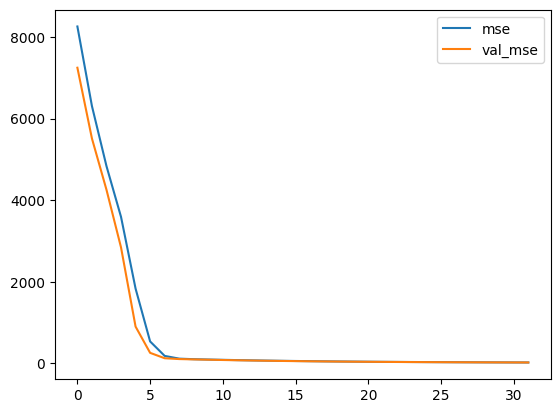

In [47]:
MSE_COLS = ["mse", "val_mse"]

pd.DataFrame(history.history)[MSE_COLS].plot()

You can add more 'flavor' to the graph by making it bigger and adding labels and names, as shown below.

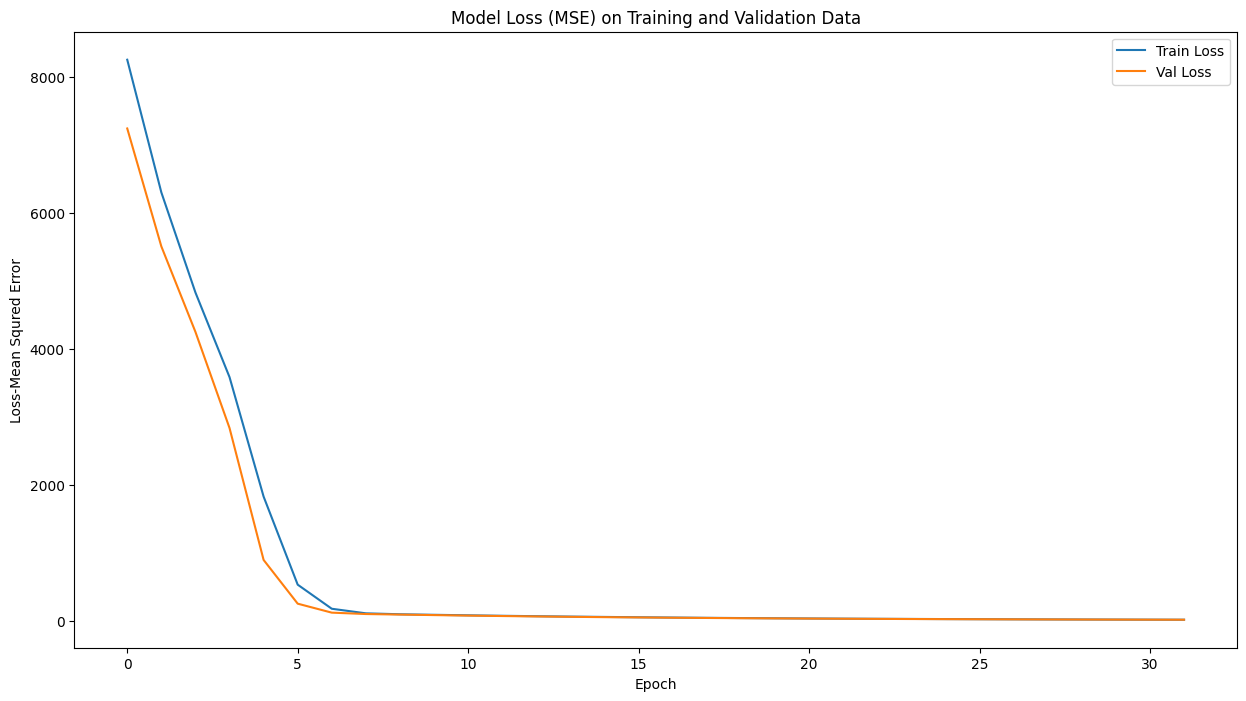

In [48]:
## Plot a graph of model loss # show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Val Loss'], loc='upper right')
plt.show()


### Predict Sales

In [49]:
'''=== predict the SALES =='''

# predict SALES using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


15/15 [==============================] - 0s 1ms/step
[31.314209   19.34237     5.1610255  28.970036   23.109612   29.78975
  3.2435849  25.224968   21.018528   20.250153    4.633294   23.10078
  3.5552633  11.416438    1.9919121   1.4145093  24.808235   13.060334
  4.493269   23.649677   14.662688    8.384277    8.384074   18.294174
  9.839402    1.5305142  11.789901   18.120747   15.701892    2.0965471
 12.648757   15.219436   30.214104   25.384865   18.056015   18.216927
 25.629295   22.100708   15.706088   12.728572   13.829589   17.209831
  4.6781497  17.291723   12.963222   17.380642    9.161975   25.629295
 10.601045   10.696483    7.8848605   1.9919121  11.435477   18.548855
  4.317181    6.856231   22.048164   27.828854    9.408042   14.360328
  9.630918    7.656715    6.8507543  18.320786   12.35356     5.2706923
 13.126643   21.195694    9.012127   20.404625    3.5459712  24.434483
  7.605661   24.456707   15.749869   22.182045   21.737762   15.013698
 15.219436   28.90459   

### True and Predicted Values

In [50]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.head(6) # Show first six rows

,True Value,Predicted Value
0,26.2,31.314209
1,19.0,19.342369
2,12.8,5.161026
3,20.8,28.970036
4,16.9,23.109612
5,23.8,29.789749


Visualize the preditction.

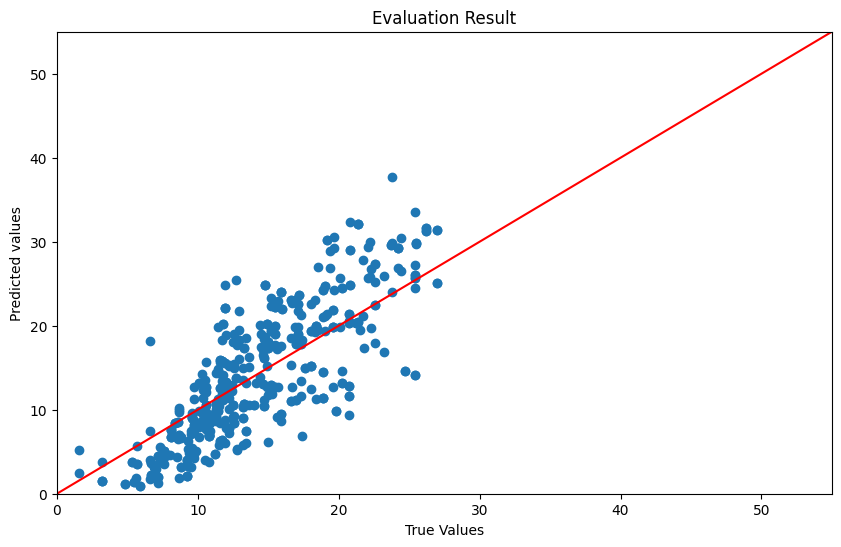

In [51]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

Show the accuracy of Linear Regression on the dataset. The linear regression graph is created by train data and the model line is shown by the blue line which is created using test data and predicted data as we can see most of the red dots are on the line, thus we can say that model has produced the best-fit line.

<Axes: xlabel='sales'>

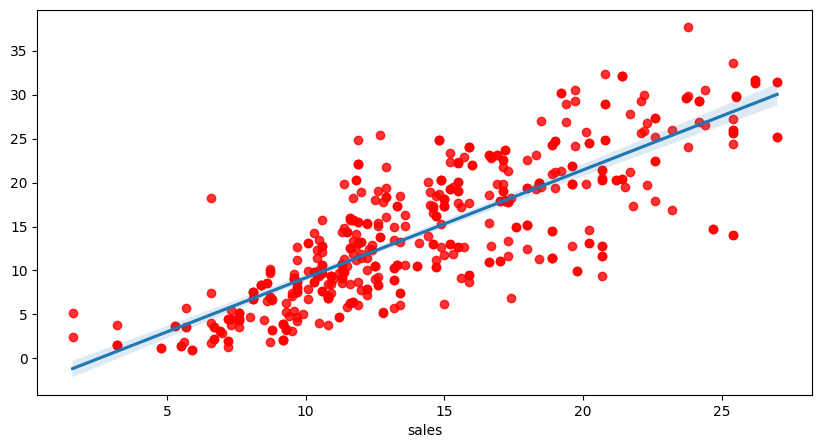

In [52]:
#Accuracy of linear regression on the dataset


plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=test_predictions,scatter_kws={'color':'red'})

### Evaluation

Step 6 - Predict on the Test Data and Compute Evaluation Metrics
The first line of code predicts on the train data, while the second line prints the RMSE value on the train data. The same is repeated in the third and fourth lines of code which predicts and prints the RMSE value on test data.

In [63]:
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred))) 

23/23 [==============================] - 0s 2ms/step
4.672382942689007
15/15 [==============================] - 0s 1ms/step
4.727561701118284


Evaluation of the Model Performance
The output above shows that the RMSE, which is our evaluation metric, was 1856 thousand for train data and 1825 thousand for test data. Ideally, the lower the RMSE value, the better the model performance. However, in contrast to accuracy, it is not straightforward to interpret RMSE as we would have to look at the unit which in our case is in thousands.

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because you want to minimize them.

In [64]:
# EXAMPLES
# Show the values of MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, test_predictions))
print('MSE:', metrics.mean_squared_error(y_test, test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_predictions)))

MAE: 3.821278415073951
MSE: 22.349839637880404
RMSE: 4.727561701118284
